In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
df = pd.read_csv('/Users/pradeepganeshamoorthy/Downloads/car data (1).csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DOMAIN ANALYSIS

1. Car_name: This column represents the name of the cars.
2. Year: This column indicates that the car belong to which year version.
3. Selling_Price: This column contains the selling price value.
4. Present_Price: This column contains the present price of the car.
5. Kms_Driven: This column has the values of the car driven kilo meter.
6. Fuel_Type: This column contains the fuel type of the car.
7. Seller_Type: This column has the seller type who sells the car.
8. Transmission: This column has the Gear transmission type.
9. Owner: This column has the number of owners.

# DATA PREPROCESSING PART1

In [3]:
df.select_dtypes(include=['int', 'float'])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [4]:
df.shape

(301, 9)

In [5]:
df.size

2709

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
df.describe(include=['O'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
df.describe(include=["int64"])

,Year,Kms_Driven,Owner
count,301.000000,301.000000,301.000000
mean,2013.627907,36947.205980,0.043189
std,2.891554,38886.883882,0.247915
min,2003.000000,500.000000,0.000000
25%,2012.000000,15000.000000,0.000000
50%,2014.000000,32000.000000,0.000000
75%,2016.000000,48767.000000,0.000000
max,2018.000000,500000.000000,3.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# EXPLORATORY DATA ANALYSIS

UNIVARIATE

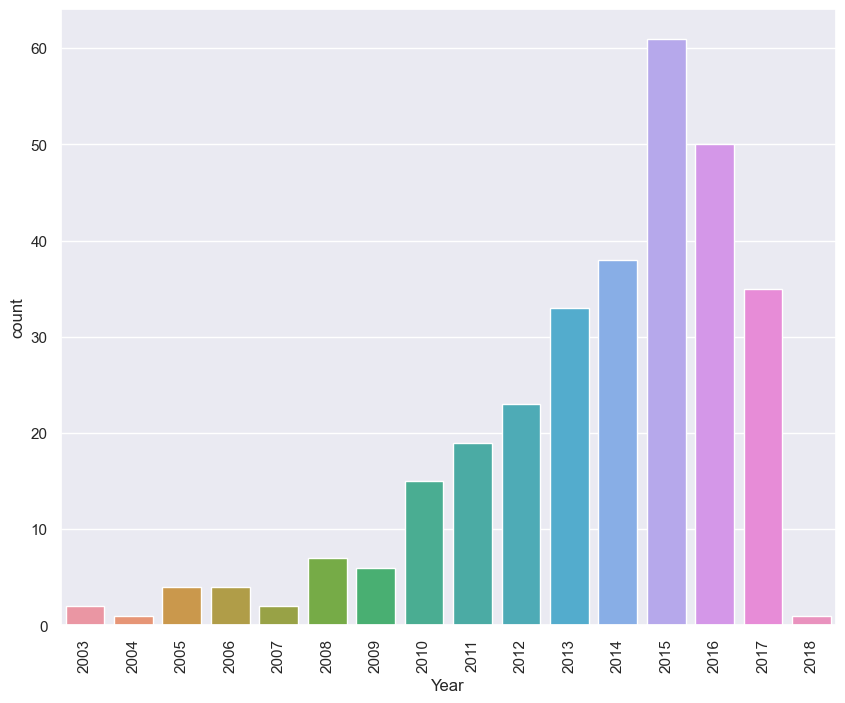

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.show()

INSIGHT

In 2015 the car selling this higher than any other years.

(array([0, 1]), [Text(0, 0, 'Dealer'), Text(1, 0, 'Individual')])

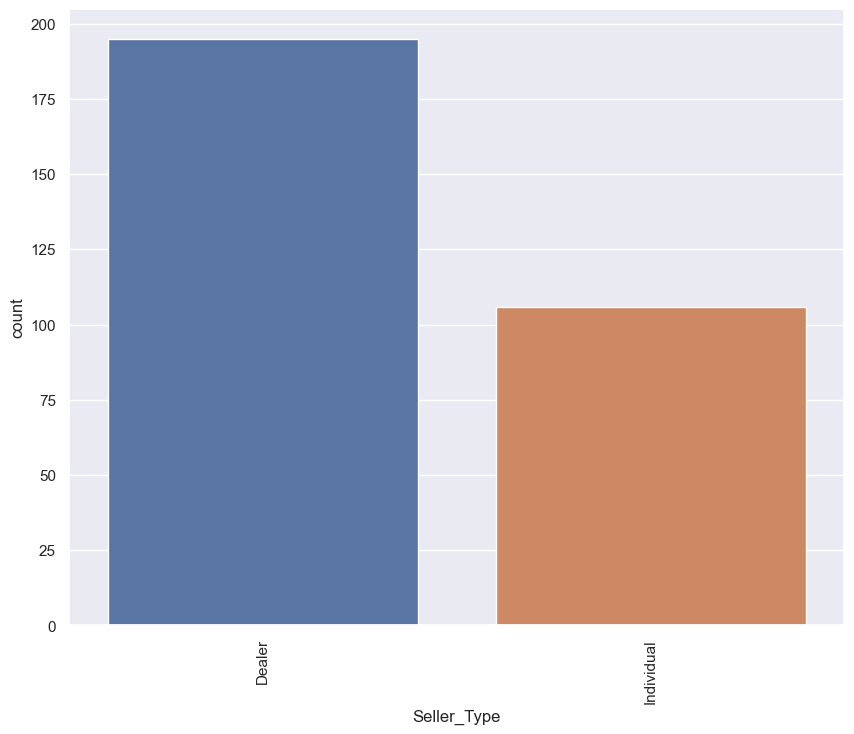

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Seller_Type',data=df)
plt.xticks(rotation=90)

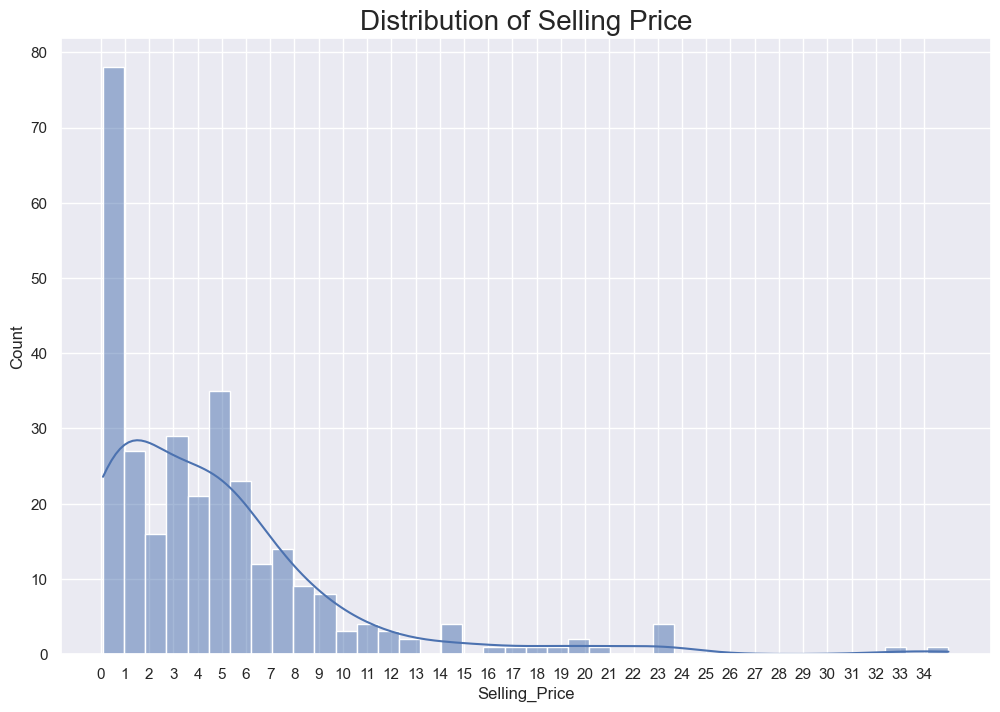

In [93]:
sns.histplot(data=df,x=df.Selling_Price,kde=True,bins=40)
plt.xticks(ticks=range(0, 35, 1))
plt.title("Distribution of Selling Price",fontsize=20)
plt.show()

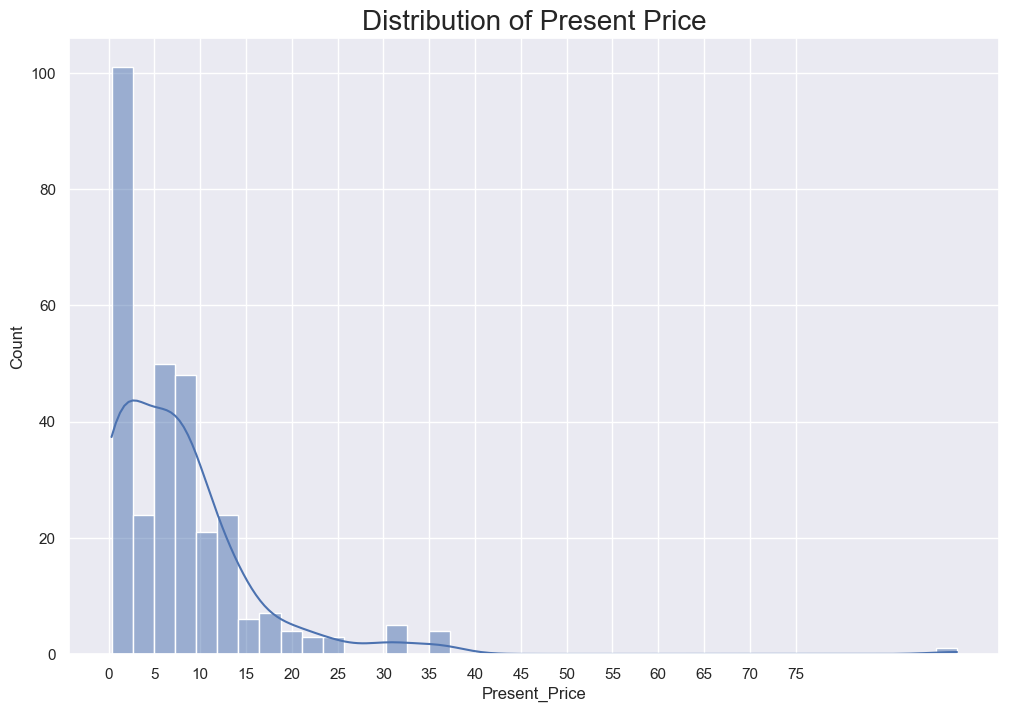

In [94]:
sns.histplot(data=df,x=df.Present_Price,kde=True,bins=40)
plt.xticks(ticks=range(0, 80, 5))
plt.title("Distribution of Present Price",fontsize=20)
plt.show()

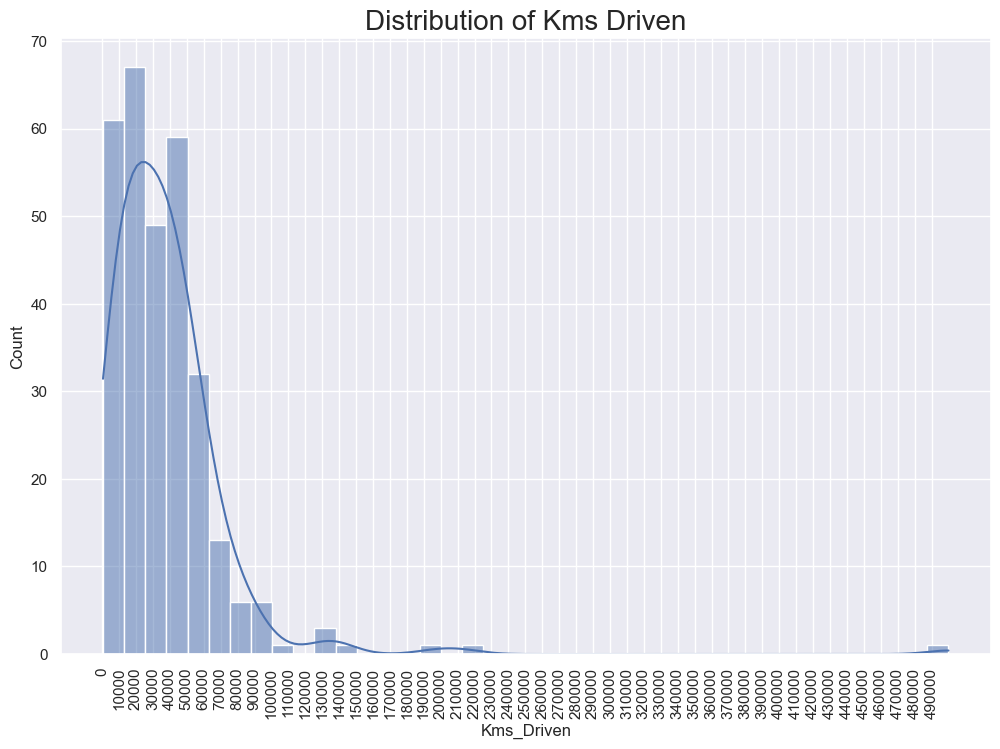

In [95]:
sns.histplot(data=df,x=df.Kms_Driven,kde=True,bins=40)
plt.xticks(ticks=range(0, 500000, 10000))
plt.xticks(rotation=90 )
plt.title("Distribution of Kms Driven",fontsize=20)
plt.show()

INSIGHT

1. More number of cars sold by Dealers than Individuals.
2. So chance of cars getting sold by Dealers also higher.

# BYVARIATE

(array([0, 1, 2]),
 [Text(0, 0, 'Petrol'), Text(1, 0, 'Diesel'), Text(2, 0, 'CNG')])

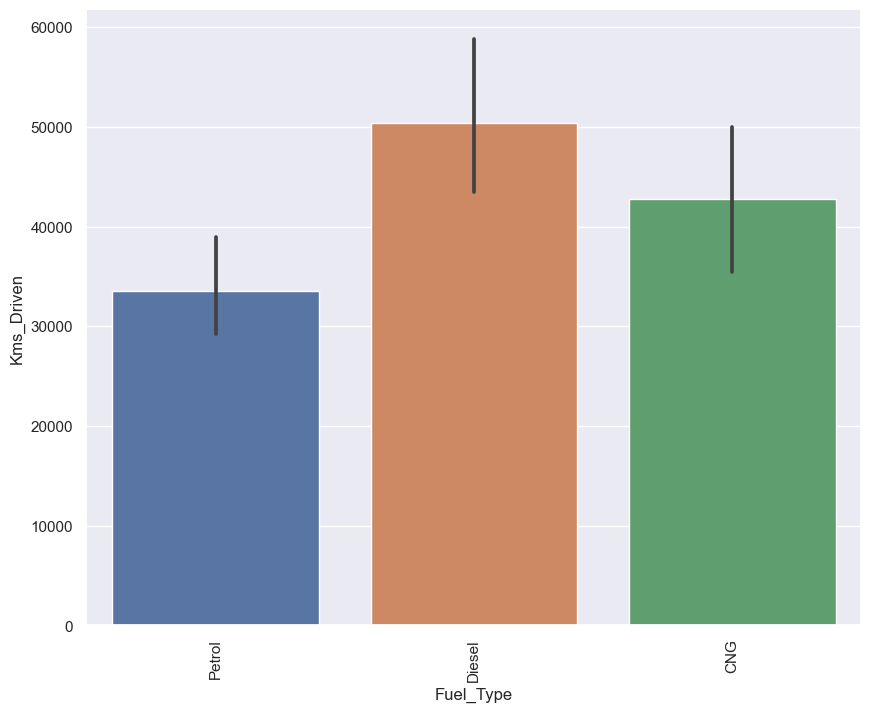

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x="Fuel_Type",y="Kms_Driven", data=df)
plt.xticks(rotation=90)

INSIGHT

Fuel type diesel cars are higher km driven followed by CNG cars.

# DATA PREPROCESSING

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no null values in this data set

In [15]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [16]:
df['Owner'].unique()

array([0, 1, 3])

In [17]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [18]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [20]:
df1 = df.copy()
df1['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2}, inplace=True)
df1['Seller_Type'].replace({'Dealer':0, 'Individual':1}, inplace=True)
df1['Transmission'].replace({'Manual':0, 'Automatic':1}, inplace=True)

In [21]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


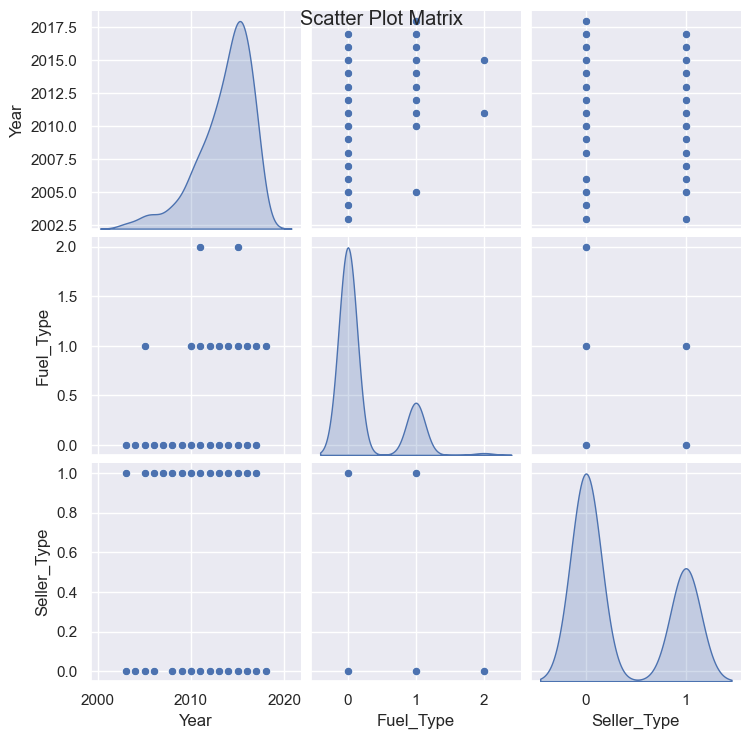

In [22]:
sns.pairplot(df1, vars=['Year', 'Fuel_Type', 'Seller_Type'], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix')
plt.show()

In [23]:
df2 = df1.copy()
df2.drop(columns=['Car_Name'], inplace=True)
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


INSIGHT

Here we can see the Fuel_Type and Seller_Type has two different peaks. So that we clearly see the two different data sets.

# SCALING

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(df2)
print(x)

[[0.73333333 0.09312321 0.0571088  ... 0.         0.         0.        ]
 [0.66666667 0.13323782 0.09991331 ... 0.         0.         0.        ]
 [0.93333333 0.20487106 0.10327265 ... 0.         0.         0.        ]
 ...
 [0.4        0.09312321 0.11573472 ... 0.         0.         0.        ]
 [0.93333333 0.32664756 0.1319896  ... 0.         0.         0.        ]
 [0.86666667 0.14899713 0.06046814 ... 0.         0.         0.        ]]


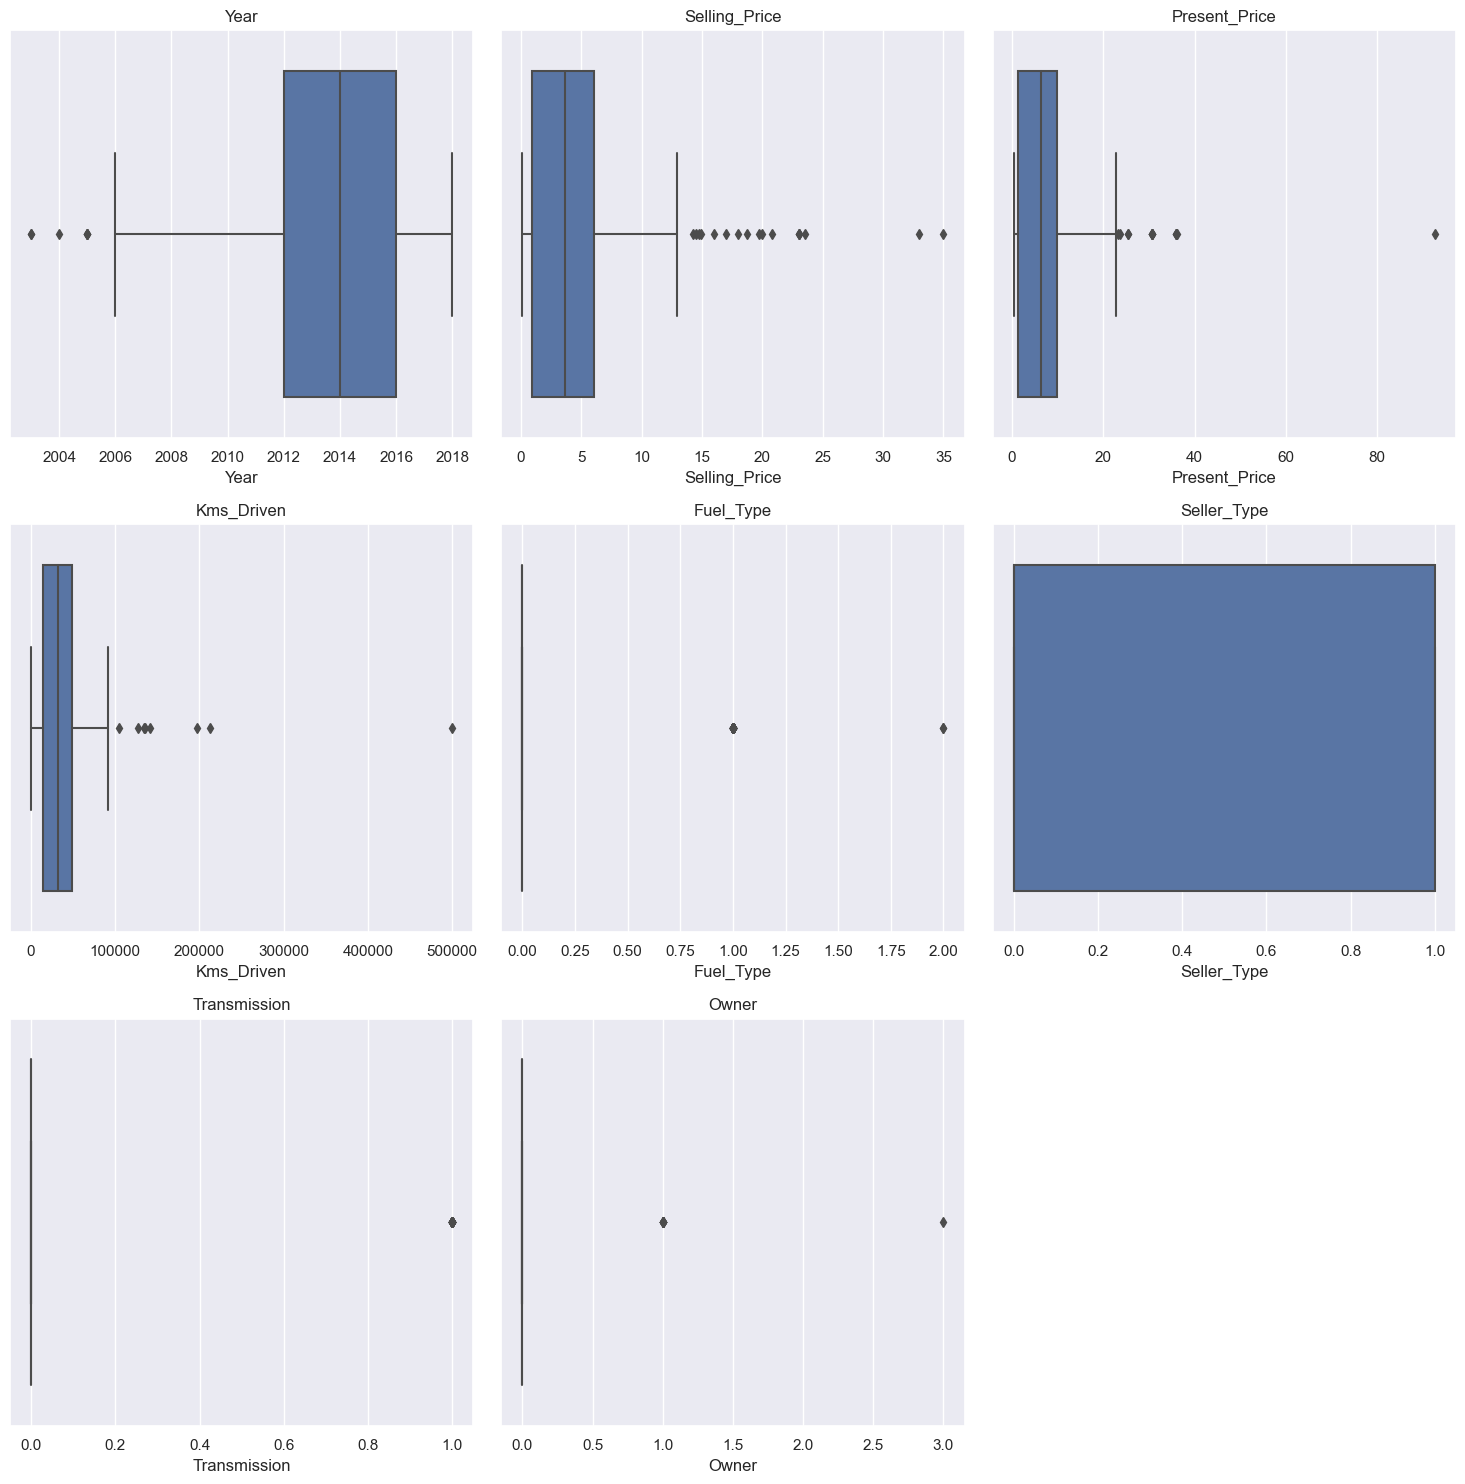

In [25]:
num_vars = df2.select_dtypes(include=['int', 'float']).columns.tolist()

num_cols = len(num_vars)
num_rows = (num_cols+2)//3
fig,axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=df2[var],ax=axs[i])
    axs[i].set_title(var)
    
if num_cols < len(axs):
    for i in range(num_cols,len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

In [26]:
df3=df2.iloc[0:10,0:10]
df3

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
5,2018,9.25,9.83,2071,1,0,0,0
6,2015,6.75,8.12,18796,0,0,0,0
7,2015,6.50,8.61,33429,1,0,0,0
8,2016,8.75,8.89,20273,1,0,0,0
9,2015,7.45,8.92,42367,1,0,0,0


In [35]:
df3.drop(columns=['Seller_Type','Transmission','Owner'], inplace=True)
df3.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
Year,1.000000,0.882093,0.758261,-0.306095,0.238008
Selling_Price,0.882093,1.000000,0.811757,-0.235465,0.433907
Present_Price,0.758261,0.811757,1.000000,0.074090,0.498217
Kms_Driven,-0.306095,-0.235465,0.074090,1.000000,0.520395
Fuel_Type,0.238008,0.433907,0.498217,0.520395,1.000000


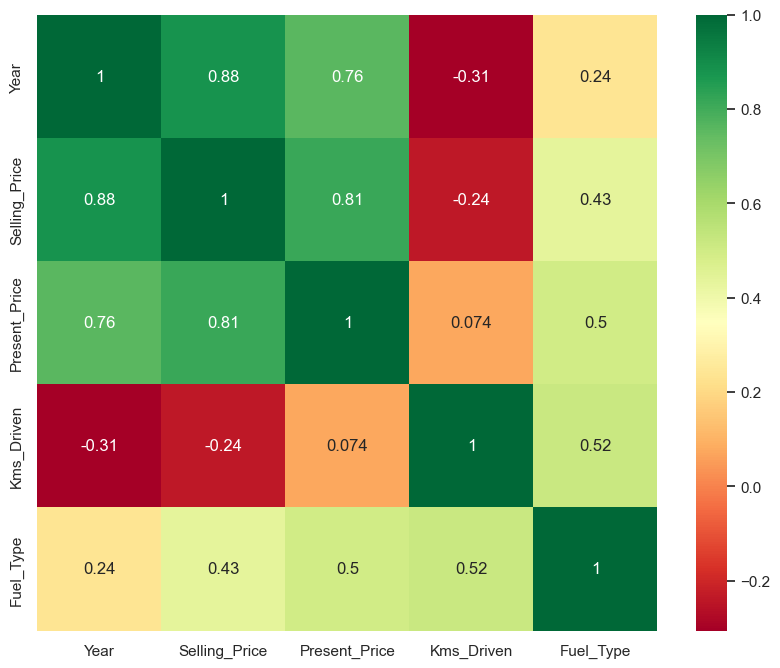

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df3.corr(),annot=True,cmap="RdYlGn")
plt.tick_params(labelsize=11)

INSIGHT

We can see the kilometer driven and selling price has negative co-relation which surpassed by km driven and year.
Selling price and Year has high postive co-relation.

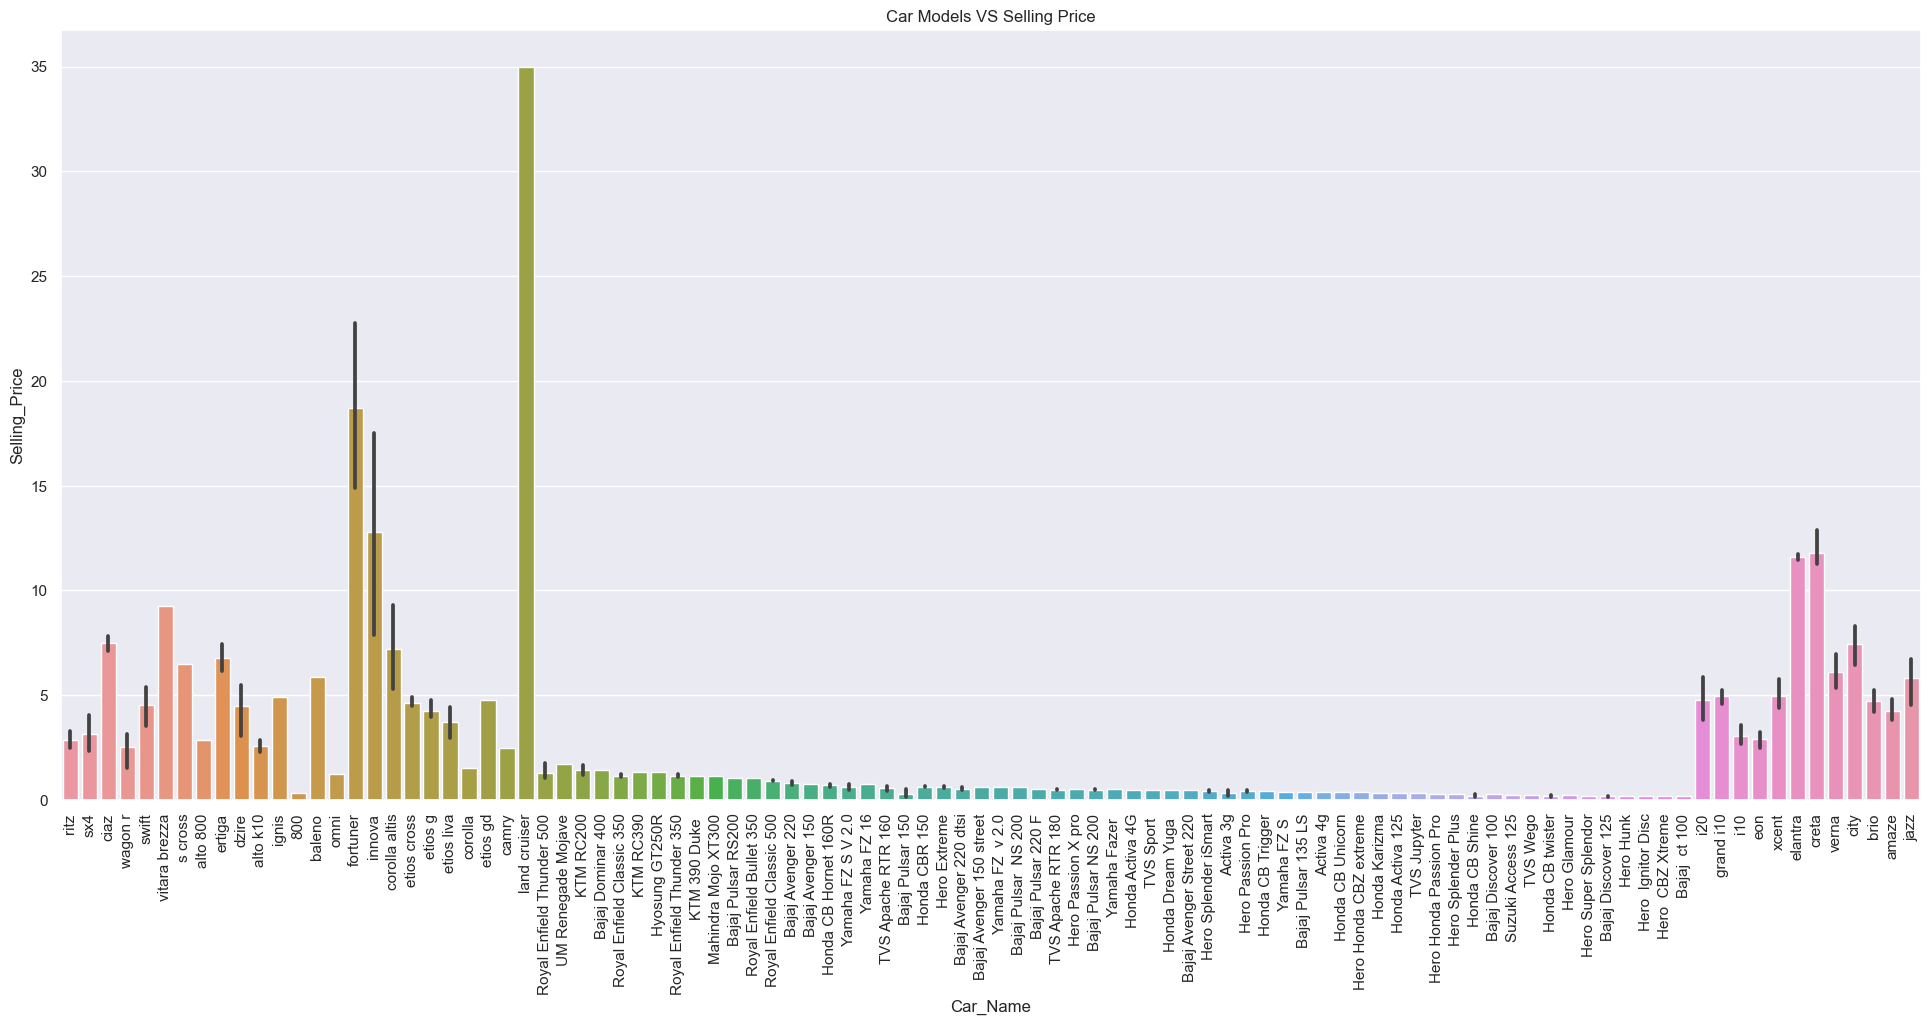

In [38]:
plt.rcParams['figure.figsize']=(24,10)
sns.barplot(y=df.Selling_Price,x=df.Car_Name)
plt.xticks(rotation=90)
plt.title("Car Models VS Selling Price")
plt.show()

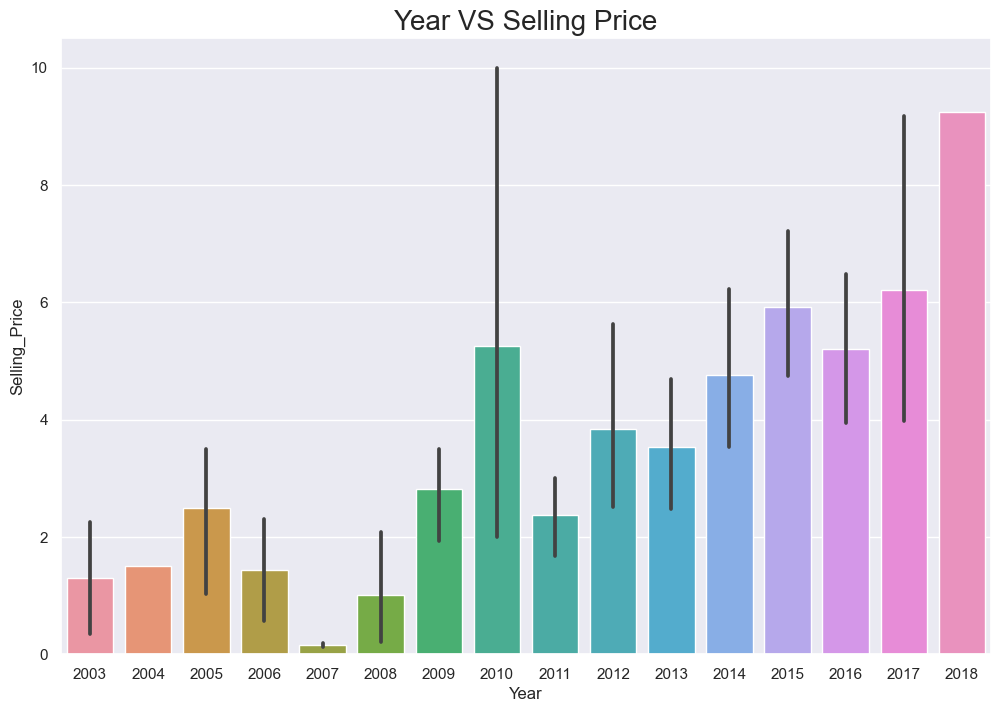

In [42]:
plt.rcParams['figure.figsize']=(12,8)
sns.barplot(y=df.Selling_Price,x=df.Year)
plt.title("Year VS Selling Price",fontsize=20)
plt.show()

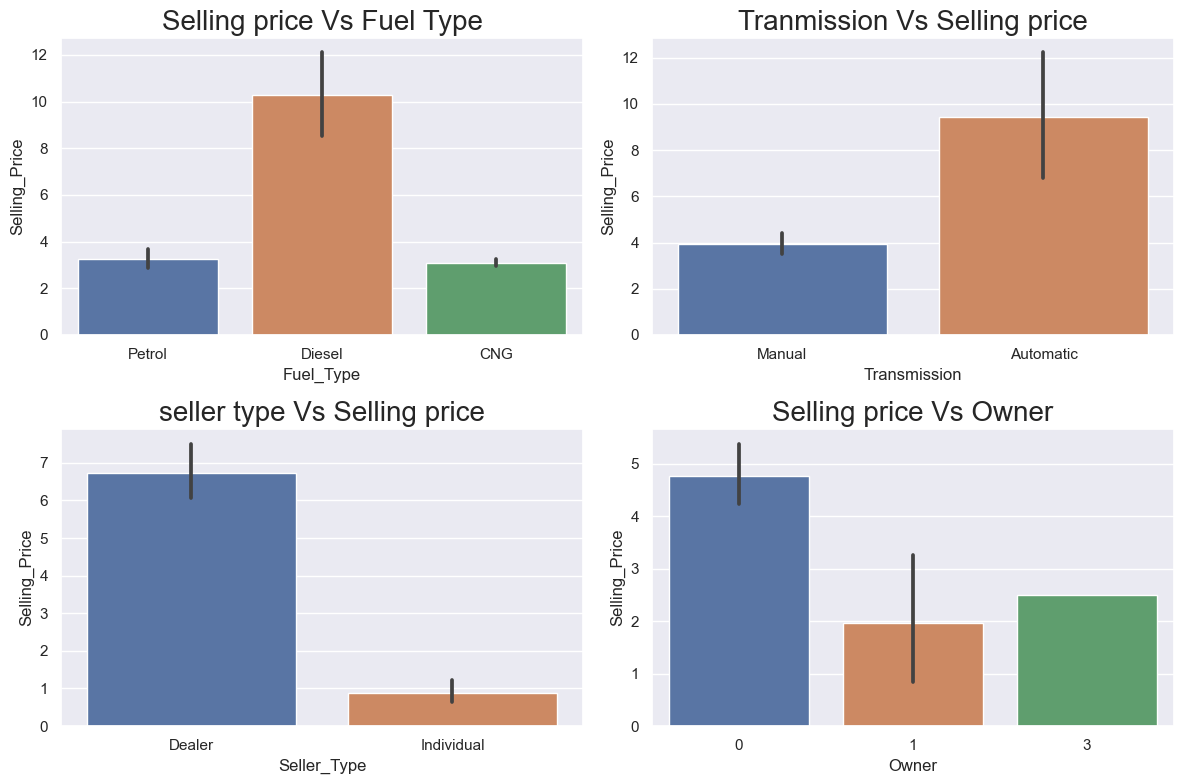

In [43]:
plt.subplot(2,2,1)
sns.barplot(y=df.Selling_Price,x=df.Fuel_Type)
plt.title("Selling price Vs Fuel Type",fontsize=20)

plt.subplot(2,2,2)
sns.barplot(y=df.Selling_Price,x=df.Transmission)
plt.title("Tranmission Vs Selling price",fontsize=20)

plt.subplot(2,2,3)
sns.barplot(y=df.Selling_Price,x=df.Seller_Type)
plt.title("seller type Vs Selling price",fontsize=20)

plt.subplot(2,2,4)
sns.barplot(y=df.Selling_Price,x=df.Owner)
plt.title("Selling price Vs Owner",fontsize=20)
plt.tight_layout()

plt.show()

# MODEL CREATION

In [29]:
x = df2.drop("Present_Price",axis=1)
y = df2["Present_Price"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 7)
(240,)
(61, 7)
(61,)


In [44]:
df_0=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_0.columns:
    if df_0[i].dtypes=='object':
        df_0[i]=le.fit_transform(df_0[i])

df_0['Year']=le.fit_transform(df_0['Year'])
y=df_0['Selling_Price']
x=df_0.drop('Selling_Price', axis=1)





from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
y_train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
# cheacking best models for training our data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [69]:
model_liner = LinearRegression()
model_liner.fit(x_train,y_train)
prediction_liner= model.predict(x_test)
r2_linear= r2_score(y_test,prediction_liner)
mse_linear= mean_squared_error(y_test,prediction_liner)
mae_linear= mean_absolute_error(y_test,prediction_liner)

In [70]:
model_lasso = Lasso()
model_lasso.fit(x_train,y_train)
prediction_lasso = model_lasso.predict(x_test)
r2_lasso= r2_score(y_test,prediction_lasso)
mse_lasso= mean_squared_error(y_test,prediction_lasso)
mae_lasso= mean_absolute_error(y_test,prediction_lasso)

In [73]:
model_randomforest = RandomForestRegressor()
model_randomforest.fit(x_train,y_train)
prediction_randomforest = model_randomforest.predict(x_test)
r2_randomforest = r2_score(y_test,prediction_randomforest)
mse_randomforest = mean_squared_error(y_test,prediction_randomforest)
mae_randomforest = mean_absolute_error(y_test,prediction_randomforest)

In [77]:
model_adaboost = AdaBoostRegressor()
model_adaboost.fit(x_train,y_train)
prediction_adaboost = model_adaboost.predict(x_test)
r2_adaboost = r2_score(y_test,prediction_adaboost)
mse_adaboost = mean_squared_error(y_test,prediction_adaboost)
mae_adaboost = mean_absolute_error(y_test,prediction_adaboost)

In [80]:
model_gradientboost = GradientBoostingRegressor()
model_gradientboost.fit(x_train,y_train)
prediction_gradientboost = model_gradientboost.predict(x_test)
r2_gradientboost = r2_score(y_test,prediction_gradientboost)
mse_gradientboost = mean_squared_error(y_test,prediction_gradientboost)
mae_gradientboost = mean_absolute_error(y_test,prediction_gradientboost)

In [83]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train,y_train)
prediction_DT = model_DT.predict(x_test)
r2_DT = r2_score(y_test,prediction_DT)
mse_DT = mean_squared_error(y_test,prediction_DT)
mae_DT = mean_absolute_error(y_test,prediction_DT)

In [86]:
model_KNNR = KNeighborsRegressor()
model_KNNR.fit(x_train,y_train)
prediction_KNNR = model_KNNR.predict(x_test)
r2_KNNR = r2_score(y_test,prediction_KNNR)
mse_KNNR = mean_squared_error(y_test,prediction_KNNR)
mae_KNNR = mean_absolute_error(y_test,prediction_KNNR)

In [89]:
model_SVR = SVR()
model_SVR.fit(x_train,y_train)
prediction_SVR = model_SVR.predict(x_test)
r2_SVR = r2_score(y_test,prediction_SVR)
mse_SVR = mean_squared_error(y_test,prediction_SVR)
mae_SVR = mean_absolute_error(y_test,prediction_SVR)

In [90]:
data = np.array([['LinearRegression', r2_linear, mse_linear, mae_linear],['Lasso', r2_lasso, mse_lasso, mae_lasso],['RandomForest', r2_randomforest, mse_randomforest, mae_randomforest],['AdaBoost', r2_adaboost, mse_adaboost, mae_adaboost],['GradientBoost', r2_gradientboost, mse_gradientboost, mae_gradientboost],['DecisionTree', r2_DT, mse_DT, mae_DT],['KNeighbor', r2_KNNR, mse_KNNR, mae_KNNR],['SVR', r2_SVR, mse_SVR, mae_SVR]])
calculation_data = pd.DataFrame(data, columns=['Name', 'R2_Score', 'MSE', 'MAE'])

In [91]:
calculation_data

,Name,R2_Score,MSE,MAE
0,LinearRegression,0.9193097723053489,2.064573925146718,1.0324597759643463
1,Lasso,0.7962882880469061,5.212253091376974,1.5864969764984767
2,RandomForest,0.9797963387533472,0.5169393295081981,0.4901213114754106
3,AdaBoost,0.9518123378831578,1.2329496837794627,0.8149392327377307
4,GradientBoost,0.9652904123730625,0.888094030894907,0.6117690014467293
5,DecisionTree,0.9762318830825227,0.6081409836065573,0.5285245901639344
6,KNeighbor,0.950020451465918,1.2787976393442624,0.825377049180328
7,SVR,0.6952809931445143,7.796667998399318,1.208999472177282


# CONCULSION

From the above table we can see the prediction of each models which we trained.
There are the models performing beyond the confidence level which 95% so that models could be overfit.
we can go with KNeighborRegression model or LinearRegression Model.
I would prefer KNeighborRegression model over the LinearRegression Model.